In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

In [2]:
data=pd.read_csv('./ChessKnight.csv').values
data=np.unique(data,axis=0)
len_all=len(data)
permu=np.random.permutation(len_all)
data=data[permu]

In [3]:
x_all=np.zeros((len_all,12,12))
index=((np.tile(np.arange(len_all),4)),(np.concatenate([data[:,0],data[:,2],data[:,4],data[:,6]])),(np.concatenate([data[:,1],data[:,3],data[:,5],data[:,7]])))
x_all[index]=1.

x_all=x_all.reshape(len_all,12,12,1)
t_all=data[:,8]
t_all=np.eye(t_all.max()+1)[t_all]

In [4]:
cuts=(0.7,0.85)
x_train=x_all[:int(cuts[0]*len_all)]
t_train=t_all[:int(cuts[0]*len_all)]
x_val=x_all[int(cuts[0]*len_all):int(cuts[1]*len_all)]
t_val=t_all[int(cuts[0]*len_all):int(cuts[1]*len_all)]
x_test=x_all[int(cuts[1]*len_all):]
t_test=t_all[int(cuts[1]*len_all):]
(np.abs(np.full(len(t_test),data[:,8].mean())-t_test.argmax(axis=1))<=2).sum()/len(t_test)

0.3585026481143025

In [5]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=(12,12,1),activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(t_all.shape[1],activation='softmax'))

In [6]:
model.compile(tf.keras.optimizers.Adam(0.001),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=[tf.keras.losses.CategoricalCrossentropy()])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 10, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               819456    
_________________________________________________________________
dense_1 (Dense)              (None, 42)                10794     
Total params: 830,570
Trainable params: 830,570
Non-trainable params: 0
_________________________________________________________________


In [8]:
history=model.fit(x_train,t_train,epochs=10,batch_size=100,validation_data=(x_val,t_val))

Epoch 1/10
3499/3499 [==============================] - 39s 11ms/step - loss: 1.8911 - categorical_crossentropy: 1.8910 - val_loss: 1.6400 - val_categorical_crossentropy: 1.6400
Epoch 2/10
3499/3499 [==============================] - 48s 14ms/step - loss: 1.4646 - categorical_crossentropy: 1.4646 - val_loss: 1.4127 - val_categorical_crossentropy: 1.4128
Epoch 3/10
3499/3499 [==============================] - 56s 16ms/step - loss: 1.2726 - categorical_crossentropy: 1.2725 - val_loss: 1.2048 - val_categorical_crossentropy: 1.2048
Epoch 4/10
3499/3499 [==============================] - 53s 15ms/step - loss: 1.1782 - categorical_crossentropy: 1.1781 - val_loss: 1.2194 - val_categorical_crossentropy: 1.2194
Epoch 5/10
3499/3499 [==============================] - 53s 15ms/step - loss: 1.1173 - categorical_crossentropy: 1.1173 - val_loss: 1.1910 - val_categorical_crossentropy: 1.1910
Epoch 6/10
3499/3499 [==============================] - 53s 15ms/step - loss: 1.0725 - categorical_crossentrop

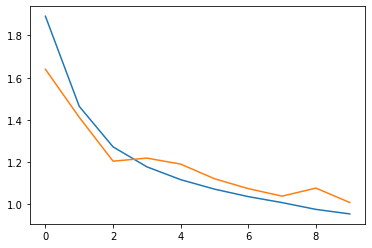

In [9]:
maximum=0
plt.plot(history.history['loss'][maximum:])
plt.plot(history.history['val_loss'][maximum:])

In [10]:
predicted_pre=model.predict(x_test)
predicted=predicted_pre.argmax(axis=1)
predicted

array([24, 20, 24, ..., 29, 26, 23])

In [11]:
t_test.argmax(axis=1)

array([24, 20, 24, ..., 28, 26, 23])

In [16]:
(np.abs(predicted-t_test.argmax(axis=1))<=1).sum()/len(t_test)

0.9643938686481943

In [13]:
dict(zip(list(np.unique(predicted-t_test.argmax(axis=1),return_counts=True)[0]),list(np.unique(predicted-t_test.argmax(axis=1),return_counts=True)[1])))

{-15: 1,
 -10: 1,
 -9: 1,
 -6: 3,
 -5: 4,
 -4: 11,
 -3: 82,
 -2: 763,
 -1: 11480,
 0: 42118,
 1: 18692,
 2: 1611,
 3: 160,
 4: 27,
 5: 2,
 6: 1,
 7: 1,
 13: 1}

In [14]:
# model.save('model (CNN).h5')